# __<center>TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN</center>__

## __<center>Trực quan hóa dữ liệu</center>__

---

In [79]:
# %conda install pandas
# %conda install numpy
# %conda install seaborn
# %conda install matplotlib
# %conda install scikit-learn

In [80]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import math

In [81]:
cover_id_df = pd.read_csv("./data/Input/1_cover_id_main.csv")
individual_id_df = pd.read_csv("./data/Input/3_individual_id_main.csv", encoding="utf-8", encoding_errors="ignore")
diary_main_df = pd.read_csv("./data/Input/4_diary_main.csv", encoding="utf-8", encoding_errors="ignore")
matinh_df = pd.read_csv("./data/Input/matinh.txt", sep='\t')

## Cover ID - This file contains the basic information of the interview and the household asset part.

In [82]:
cover_id_df.head()

,ID,pid,MATINH,Urban_Rural,age,C1,C2,TOTAL_HH_member,assets_1,assets_2,...,assets_12,assets_13,assets_14,assets_15,assets_16,assets_17,assets_18,assets_19,C9,C10
0,10010000600801,1,1,1,28,1,1,2,0,1,...,1,1,1,1,1,0,0,0,1,NaN
1,10010000600803,2,1,1,48,1,2,3,0,1,...,1,1,1,0,1,1,1,0,1,NaN
2,10010000600814,1,1,1,29,1,1,2,0,1,...,1,1,1,0,1,1,1,0,1,NaN
3,10010000600823,1,1,1,40,1,1,1,0,1,...,1,1,1,0,1,1,1,0,1,NaN
4,10010000600824,4,1,1,52,1,4,5,0,1,...,1,1,1,0,1,1,1,0,1,NaN


### Số dòng và cột của dữ liệu.

In [83]:
shape = cover_id_df.shape
print(f"Cases: {shape[0]}")
print(f"Variables: {shape[1]}")

Cases: 6001
Variables: 29


### Dữ liệu bị trùng và bị thiếu.

In [84]:
print(f"Number of duplicated rows: {cover_id_df.duplicated().sum()}" )
cover_id_df.isna().sum()

Number of duplicated rows: 0


ID                    0
pid                   0
MATINH                0
Urban_Rural           0
age                   0
C1                    0
C2                    0
TOTAL_HH_member       0
assets_1              0
assets_2              0
assets_3              0
assets_4              0
assets_5              0
assets_6              0
assets_7              0
assets_8              0
assets_9              0
assets_10             0
assets_11             0
assets_12             0
assets_13             0
assets_14             0
assets_15             0
assets_16             0
assets_17             0
assets_18             0
assets_19             0
C9                    0
C10                5654
dtype: int64

> Chỉ có cột `C10` là có rất nhiều dữ liệu bị thiếu. Các cột đều có kiểu dữ liệu `int64`.

### Nhận xét chung.

- Tự các nhận xét ở trên. Cột `C10` bị thiếu gần như toàn bộ nên ta sẽ tiến hành loại bỏ cột này.
- Cũng theo đó, như ý nghĩa của các cột dữ liệu khảo sát. Cột `C9` có liên quan đến `C10` và cũng không quá liên quan đến dữ liệu. Ta tiến hành loại bỏ cột này.

In [85]:
cover_id_df.drop(['pid','C9', 'C10'], axis=1, inplace=True)
cover_id_df.describe()

,ID,MATINH,Urban_Rural,age,C1,C2,TOTAL_HH_member,assets_1,assets_2,assets_3,...,assets_10,assets_11,assets_12,assets_13,assets_14,assets_15,assets_16,assets_17,assets_18,assets_19
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,...,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000
mean,5.232553e+14,51.800033,1.617564,40.096317,1.305949,2.340777,3.427762,0.044493,0.958507,0.605399,...,0.103649,0.942676,0.440927,0.713881,0.967505,0.193968,0.984336,0.246959,0.414431,0.008832
std,2.849148e+14,28.227758,0.486023,13.308558,1.304114,0.976568,1.411201,0.206204,0.199444,0.488806,...,0.304831,0.232480,0.496539,0.451983,0.177324,0.395437,0.124182,0.431279,0.492665,0.093570
min,1.001000e+13,1.000000,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.131312e+14,31.000000,1.000000,30.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.849720e+14,48.000000,2.000000,39.000000,1.000000,2.000000,3.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.775427e+14,77.000000,2.000000,51.000000,1.000000,3.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,9.596132e+14,95.000000,2.000000,64.000000,10.000000,7.000000,11.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cover_id_df.columns

Index(['ID', 'MATINH', 'Urban_Rural', 'age', 'C1', 'C2', 'TOTAL_HH_member',
       'assets_1', 'assets_2', 'assets_3', 'assets_4', 'assets_5', 'assets_6',
       'assets_7', 'assets_8', 'assets_9', 'assets_10', 'assets_11',
       'assets_12', 'assets_13', 'assets_14', 'assets_15', 'assets_16',
       'assets_17', 'assets_18', 'assets_19'],
      dtype='object')

In [87]:
cover_id_df.rename( columns={
    'C1': 'Ethnicity', 'C2': 'Num of 15-64y.o HH members', 'assets_1': 'Automobile', 'assets_2' : 'Motorbike', 'assets_3' : 'Bike',
    'assets_4': 'Ship/boats', 'assets_5' : 'Pumping machine', 'assets_6': 'Electricity generators', 'assets_7': 'Moblie phone',
    'assets_8': 'Sewing machine', 'assets_9': 'TV', 'assets_10' : 'Computer/Laptop', 'assets_11' : 'Refrigerator', 'assets_12': 'Air conditioner',
    'assets_13':  'Washing machine', 'assets_14' : 'Gas stove', 'assets_15': 'Elctric worker', 'assets_16': 'Rice cooker', 'assets_17': 'Baking oven',
    'assets_18': 'Citrus juicer', 'assets_19':'Piano/Keyboard'}, inplace= True
)

In [88]:
cover_id_df.columns

Index(['ID', 'MATINH', 'Urban_Rural', 'age', 'Ethnicity',
       'Num of 15-64y.o HH members', 'TOTAL_HH_member', 'Automobile',
       'Motorbike', 'Bike', 'Ship/boats', 'Pumping machine',
       'Electricity generators', 'Moblie phone', 'Sewing machine', 'TV',
       'Computer/Laptop', 'Refrigerator', 'Air conditioner', 'Washing machine',
       'Gas stove', 'Elctric worker', 'Rice cooker', 'Baking oven',
       'Citrus juicer', 'Piano/Keyboard'],
      dtype='object')

In [89]:
cover_id_df = cover_id_df.merge(matinh_df, on='MATINH')

In [90]:
cover_id_df.to_excel('./data/Output/Cover_id.xlsx')

## Individual ID

In [91]:
individual_id_df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,Q302,Q303A,Q303B,Q304_1,...,Q310B1,Q310B2,Q311,Q305A,Q305B,Q310AA,Q310B,region3,agegroup,weight
0,464741975000808,4,46,1,37,1,12,4,4,1,...,NaN,NaN,NaN,th___ c__ kh,NaN,NaN,NaN,Central,15-44,1669648
1,565682237802338,4,56,1,32,1,12,3,2,1,...,NaN,NaN,NaN,nhn vin cty c___p thot n_____c,NaN,NaN,NaN,Central,15-44,1669648
2,484922025401426,5,48,1,43,1,9,2,0,1,...,NaN,NaN,NaN,ch___y shopee,NaN,NaN,NaN,Central,15-44,1669648
3,383931534600537,4,38,1,42,1,12,3,0,1,...,NaN,NaN,NaN,cng nhn,NaN,NaN,NaN,Central,15-44,1669648
4,464802002000820,4,46,1,38,1,6,1,0,1,...,NaN,NaN,NaN,th___ xy d___ng,NaN,NaN,NaN,Central,15-44,1669648


In [92]:
print(f"Có {len(individual_id_df['Q305A'].unique())} câu trả lời xuất hiện trong Q305A gồm: {individual_id_df['Q305A'].unique()}" )

Có 2012 câu trả lời xuất hiện trong Q305A gồm: ['th___ c__ kh' 'nhn vin cty c___p thot n_____c' 'ch___y shopee' ...
 'bu___n bn qun an' 'dan lt' 'BUN BN CHU___I']


Dữ liệu của Q305A bị lỗi và khá khó nhận biết. Các cột dữ liệu khác có thể phần nào giúp trả lời dữ liệu trong cột này nên ta có thể loại bỏ.

In [93]:
num_nan_in_columns = individual_id_df.isna().sum()
cols_has_nan = num_nan_in_columns[num_nan_in_columns!=0].to_frame().T

for col in cols_has_nan.columns:
    cols_has_nan[col] = cols_has_nan[col].apply(lambda x: np.array([x, len(individual_id_df) - x]))
cols_has_nan

,Q304_2,Q304_3,Q304_4,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309,Q310A1,Q310A2,Q310B1,Q310B2,Q311,Q305A,Q305B,Q310AA,Q310B
0,"[5872, 129]","[6000, 1]","[6001, 0]","[1506, 4495]","[1506, 4495]","[1506, 4495]","[1507, 4494]","[1506, 4495]","[1506, 4495]","[1747, 4254]","[1747, 4254]","[5461, 540]","[5461, 540]","[5461, 540]","[5461, 540]","[5461, 540]","[1506, 4495]","[6001, 0]","[5461, 540]","[6001, 0]"


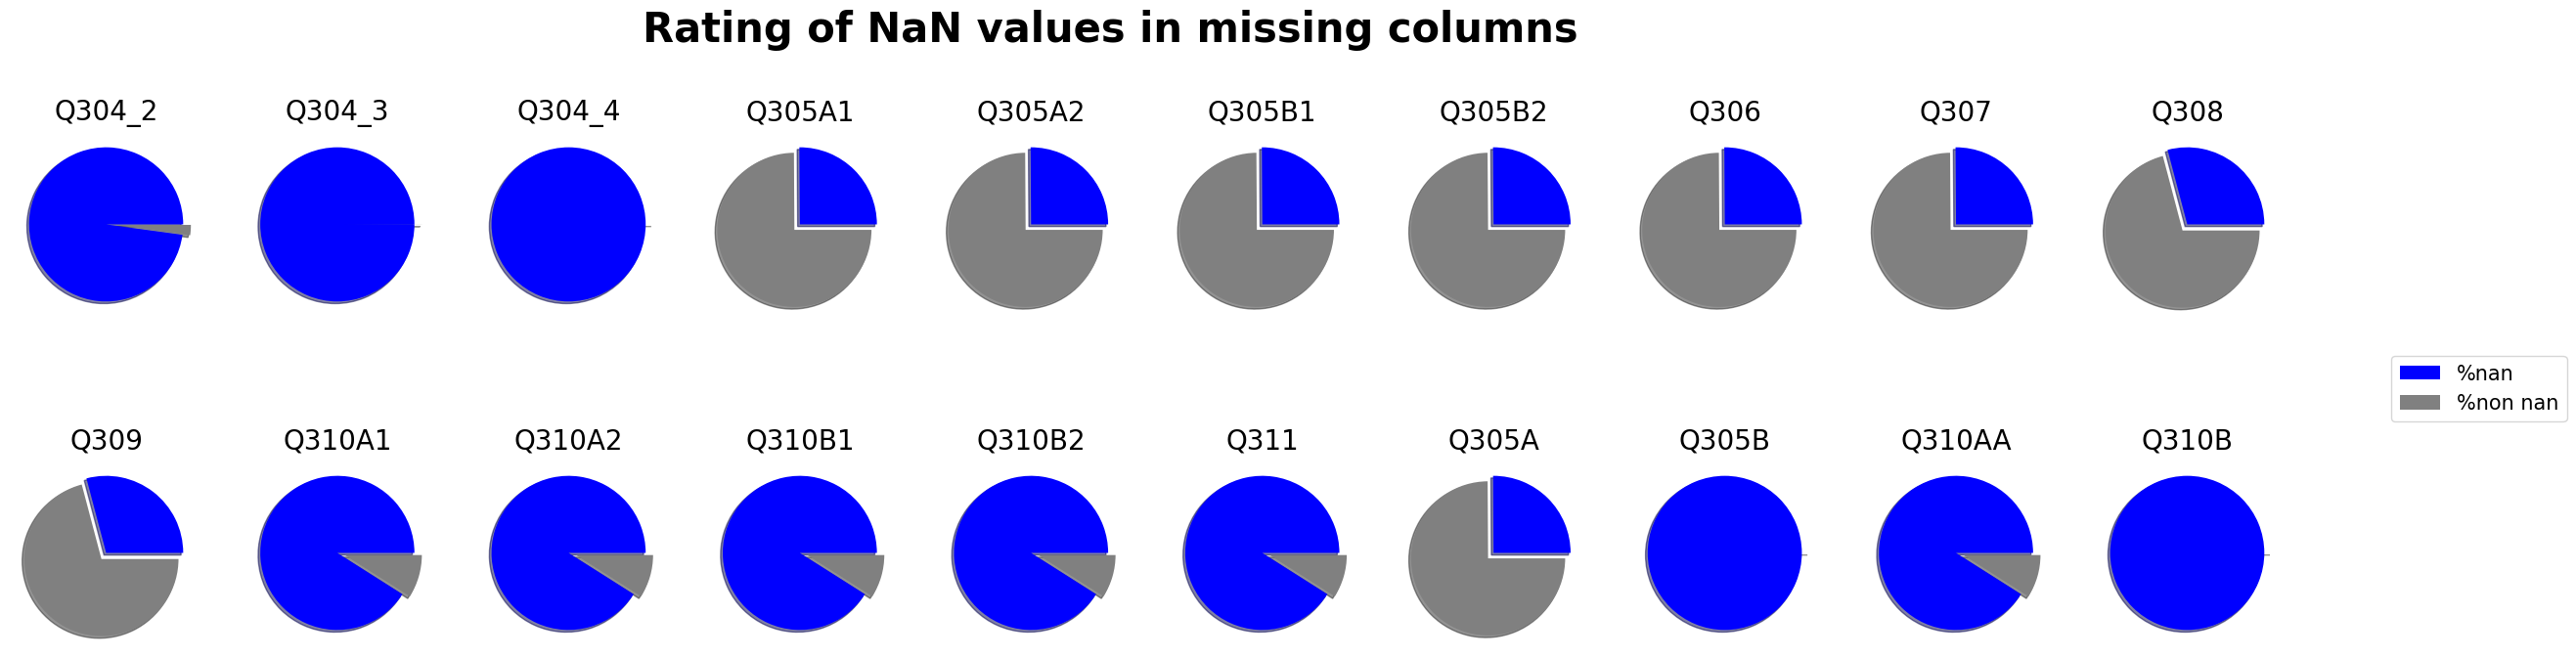

In [94]:
fig, ax = plt.subplots(2, 10, figsize = (30, 8))

explode = [0,0.1]
labels = ['%nan', '%non nan']
line = 0
for ind, col in enumerate(cols_has_nan.columns): 
    ax[math.floor(ind/10)][ind % 10].pie(cols_has_nan[col][0], colors = ["blue", "grey"], explode = explode, shadow = True)
    ax[math.floor(ind/10)][ind % 10].set_title(f"{col}", fontsize = 20)

fig.suptitle("Rating of NaN values in missing columns", fontsize = 30, fontweight = "bold")
fig.legend(labels = labels,  bbox_to_anchor = (1,0.55), fontsize = 15)
plt.show()

Ta rất khó phân tích các cột dữ liệu bị thiếu hơn 1 nửa nên sẽ tiến hành loại bỏ các cột này. Các cột còn lại có thể tiến hành xem xét loại bỏ tùy vào ý nghĩa của nó với phân tích.

In [95]:
High_nan = num_nan_in_columns[num_nan_in_columns/len(individual_id_df) >= 0.5].to_frame().T
individual_id_df.drop(High_nan.columns, axis = 1, inplace=True)
individual_id_df.drop(['pid','Urban_Rural','age','Q305A', 'weight'], axis=1, inplace= True)

In [96]:
individual_id_df.describe()

,ID,MATINH,gender,Q302,Q303A,Q303B,Q304_1,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,4495.000000,4495.000000,4495.000000,4494.000000,4495.000000,4495.000000,4254.00000,4254.000000
mean,5.232553e+14,51.800033,1.658890,9.024163,2.216297,0.234128,1.456591,7.849388,75.767075,8.091880,41.976190,3.371301,1.053615,12936.49859,1.742125
std,2.849148e+14,28.227758,0.474122,3.179400,1.240245,0.791207,1.120189,25.657483,30.578589,16.368483,35.403227,1.454341,0.225282,81958.98996,0.437516
min,1.001000e+13,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000
25%,3.131312e+14,31.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.000000,61.000000,1.000000,1.000000,2.000000,1.000000,3000.00000,1.000000
50%,4.849720e+14,48.000000,2.000000,9.000000,2.000000,0.000000,1.000000,7.000000,75.000000,6.000000,42.000000,4.000000,1.000000,5500.00000,2.000000
75%,7.775427e+14,77.000000,2.000000,12.000000,3.000000,0.000000,3.000000,9.000000,93.000000,13.000000,68.000000,4.000000,1.000000,8000.00000,2.000000
max,9.596132e+14,95.000000,2.000000,12.000000,6.000000,4.000000,3.000000,998.000000,998.000000,998.000000,99.000000,6.000000,2.000000,999999.00000,2.000000


Theo như mô tả trên ta có thể thấy số lượng dòng không bị thiếu (count) của các cột có dữ liệu bị thiếu còn lại có số lượng gần tương đương nhau.
Xem xét ý nghĩa gần như chúng có sự liên quan đến thuộc tính khác mà người khảo sát không trả lời. Ta có thể điền 0 vào các thuộc tính này.

In [97]:
Fill = individual_id_df.isna().sum()
Fill_cols = Fill[Fill > 0].index
for col in Fill_cols:
    individual_id_df[col] = individual_id_df[col].fillna(0)


In [98]:
individual_id_df.describe()

,ID,MATINH,gender,Q302,Q303A,Q303B,Q304_1,Q305A1,Q305A2,Q305B1,Q305B2,Q306,Q307,Q308,Q309
count,6.001000e+03,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000,6001.000000
mean,5.232553e+14,51.800033,1.658890,9.024163,2.216297,0.234128,1.456591,5.879520,56.752708,6.061156,31.434928,2.525246,0.789202,9170.449092,1.234961
std,2.849148e+14,28.227758,0.474122,3.179400,1.240245,0.791207,1.120189,22.464535,42.185888,14.594112,35.637033,1.929008,0.496713,69252.951448,0.872993
min,1.001000e+13,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.131312e+14,31.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.849720e+14,48.000000,2.000000,9.000000,2.000000,0.000000,1.000000,6.000000,63.000000,3.000000,14.000000,4.000000,1.000000,3000.000000,2.000000
75%,7.775427e+14,77.000000,2.000000,12.000000,3.000000,0.000000,3.000000,9.000000,93.000000,9.000000,56.000000,4.000000,1.000000,7000.000000,2.000000
max,9.596132e+14,95.000000,2.000000,12.000000,6.000000,4.000000,3.000000,998.000000,998.000000,998.000000,99.000000,6.000000,2.000000,999999.000000,2.000000


In [99]:
individual_id_df.rename(columns= {'Q302': 'Grade', 'Q303A': 'Lv.Education', 'Q303B' :'Lv.Cocational', 'Q304_1': 'Income Act', 
                                  'Q305A1': 'Jobs', 'Q305A2': 'Jobs/(Detail)', 'Q305B1':'Industry','Q305B2': 'Industry(Detail)', 'Q306': 'Organization/Invidual Type', 'Q307': 'Has Salary', 
                                   'Q308': 'Salary', 'Q309': 'Contact/Agreement'}, inplace= True)
individual_id_df.head()

,ID,MATINH,gender,Grade,Lv.Education,Lv.Cocational,Income Act,Jobs,Jobs/(Detail),Industry,Industry(Detail),Organization/Invidual Type,Has Salary,Salary,Contact/Agreement,region3,agegroup
0,464741975000808,46,1,12,4,4,1,9.0,93.0,3.0,33.0,4.0,1.0,9000.0,2.0,Central,15-44
1,565682237802338,56,1,12,3,2,1,4.0,42.0,5.0,36.0,5.0,1.0,15000.0,1.0,Central,15-44
2,484922025401426,48,1,9,2,0,1,9.0,93.0,21.0,96.0,4.0,1.0,6000.0,1.0,Central,15-44
3,383931534600537,38,1,12,3,0,1,7.0,75.0,3.0,32.0,6.0,1.0,8500.0,1.0,Central,15-44
4,464802002000820,46,1,6,1,0,1,9.0,93.0,6.0,41.0,4.0,1.0,7000.0,2.0,Central,15-44


In [100]:
individual_id_df = individual_id_df.merge(matinh_df, on='MATINH')

In [101]:
individual_id_df.to_excel('./data/Output/Individual_id.xlsx')

## Diary main

In [102]:
diary_main_df.head()

,ID,pid,MATINH,Urban_Rural,age,gender,job_dsecription,job_group,SEQ,BEGIN,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
0,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,18,1350,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,8,750,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,5.0,NaN
2,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,4,340,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,5.0,NaN
3,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,7,710,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
4,10010000600801,1,1,1,28,2,NHN VIN BN HNG,1,19,1370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
print(f"Có {len(diary_main_df['job_dsecription'].unique())} câu trả lời xuất hiện trong Job_dsecription gồm: {diary_main_df['job_dsecription'].unique()}" )

Có 1532 câu trả lời xuất hiện trong Job_dsecription gồm: ['NHN VIN BN HNG' 'NHN VIN VAN PHNG' 'LAO D___NG T___ DO' ...
 'CNG  VIN CH___C' 'BN CFE' 'BN RAU C___I']


Câu trả lời khó nhận biết cũng như biên dịch lại nên ta tiến hành loại bỏ cột này.

In [104]:
diary_main_df.drop(['job_dsecription'], axis= 1, inplace= True)

- Các cột từ `int1-6` là công việc phụ giúp người khác trong gia đình. Ta sẽ thay đổi các giá trị NaN thành giá trị No.

In [105]:
for col in diary_main_df.columns:
    if "int" in col:
        diary_main_df[col] = diary_main_df[col].fillna(0)
diary_main_df

,ID,pid,MATINH,Urban_Rural,age,gender,job_group,SEQ,BEGIN,END,...,int1,int2,int3,int4,int5,int6,Q406A,Q406B,Q407A,Q407B
0,10010000600801,1,1,1,28,2,1,18,1350,1370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
1,10010000600801,1,1,1,28,2,1,8,750,900,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,5.0,NaN
2,10010000600801,1,1,1,28,2,1,4,340,360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,NaN
3,10010000600801,1,1,1,28,2,1,7,710,750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,NaN
4,10010000600801,1,1,1,28,2,1,19,1370,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118928,959613192702040,1,95,2,50,2,5,1,240,300,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
118929,959613192702040,1,95,2,50,2,5,3,330,360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN
118930,959613192702040,1,95,2,50,2,5,5,420,600,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
118931,959613192702040,1,95,2,50,2,5,9,1020,1050,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
num_nan_in_columns = diary_main_df.isna().sum()
cols_has_nan = num_nan_in_columns[num_nan_in_columns!=0].to_frame().T

for col in cols_has_nan.columns:
    cols_has_nan[col] = cols_has_nan[col].apply(lambda x: np.array([x, len(diary_main_df) - x]))

cols_has_nan.columns

Index(['Q402', 'Q403', 'Q404', 'Q406A', 'Q406B', 'Q407A', 'Q407B'], dtype='object')

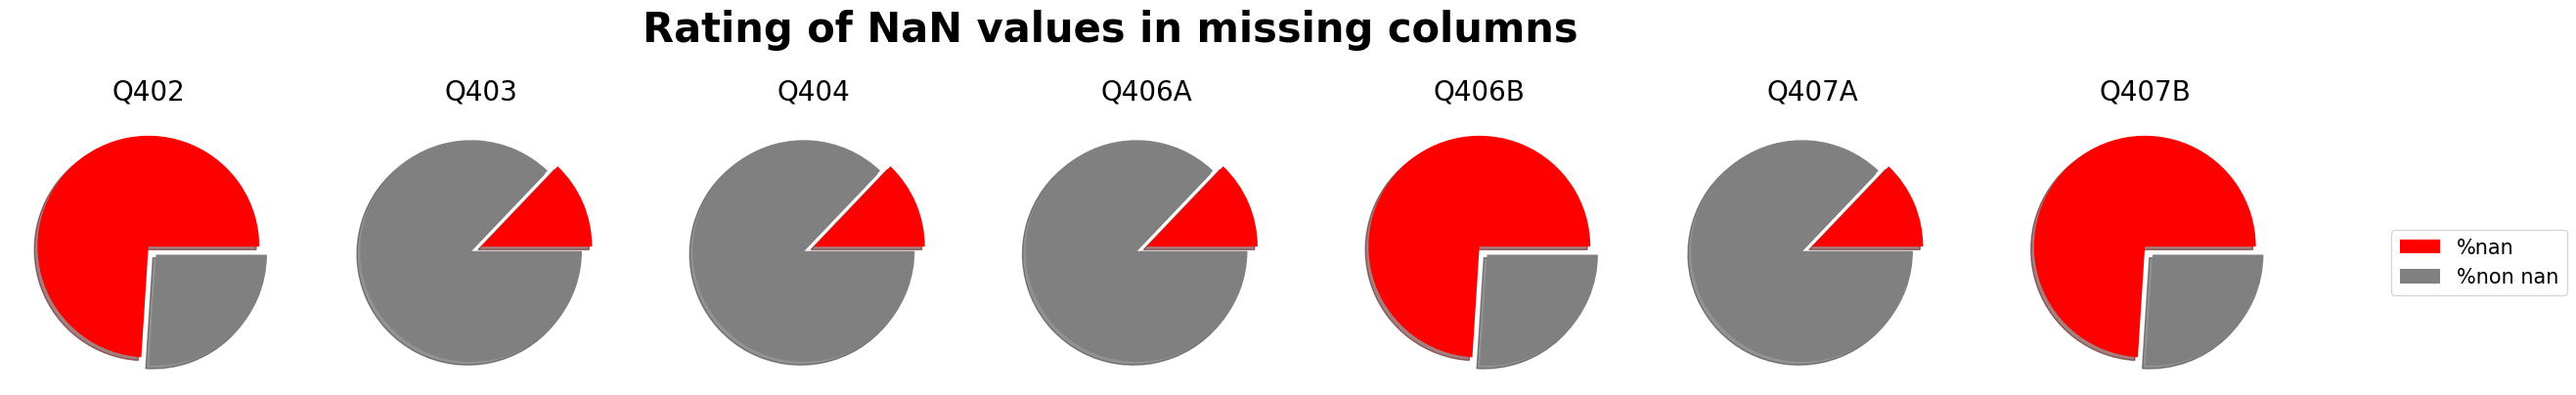

In [107]:
fig, ax = plt.subplots(1, len(cols_has_nan.columns), figsize = (30, 5))

explode = [0,0.1]
labels = ['%nan', '%non nan']

for ind, col in enumerate(cols_has_nan.columns): 
    ax[ind].pie(cols_has_nan[col][0], colors = ["red", "grey"], explode = explode, shadow = True)
    ax[ind].set_title(f"{col}", fontsize = 20)

fig.suptitle("Rating of NaN values in missing columns", fontsize = 30, fontweight = "bold")
fig.legend(labels = labels,  bbox_to_anchor = (1,0.55), fontsize = 15)
plt.show()

- Có nhiều cột lượng thông tin không đủ để phân tích. Ta tiến hành loại bỏ các cột có số thông tin bị thiếu trên 50%.
- Các cột khác có số lượng dữ liệu thiếu như nhau. Có thể tiến hành như với dữ liệu trên để loại bỏ dữ liệu thiếu.

In [108]:
High_nan = num_nan_in_columns[num_nan_in_columns/len(diary_main_df) >= 0.5].to_frame().T
diary_main_df.drop(High_nan.columns, axis = 1, inplace=True)

In [109]:
diary_main_df.drop(['pid', 'Urban_Rural','age'], axis= 1, inplace= True)
diary_main_df.describe()

,ID,MATINH,gender,job_group,SEQ,BEGIN,END,Duration,Q401,Q403,Q404,int1,int2,int3,int4,int5,int6,Q406A,Q407A
count,1.189330e+05,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,103613.000000,103613.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,118933.000000,103613.000000,103613.000000
mean,5.029142e+14,49.785964,1.688505,2.957321,11.187231,777.376254,850.034305,72.658051,1048.135438,2.247604,1.321494,0.087528,0.021298,0.067458,0.084115,0.006987,0.085502,0.124936,1.070512
std,2.833776e+14,28.074580,0.463106,1.656020,7.035456,338.004077,368.111278,95.340095,492.187073,2.022178,0.467052,0.282609,0.144376,0.250815,0.277561,0.083297,0.279628,0.330648,1.569925
min,1.001000e+13,1.000000,1.000000,1.000000,1.000000,240.000000,250.000000,10.000000,101.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130411e+14,31.000000,1.000000,1.000000,5.000000,450.000000,520.000000,20.000000,601.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445419e+14,44.000000,2.000000,2.000000,10.000000,750.000000,810.000000,30.000000,1402.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.574226e+14,75.000000,2.000000,5.000000,16.000000,1080.000000,1110.000000,80.000000,1502.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,9.596132e+14,95.000000,2.000000,5.000000,47.000000,1670.000000,1680.000000,860.000000,9999.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


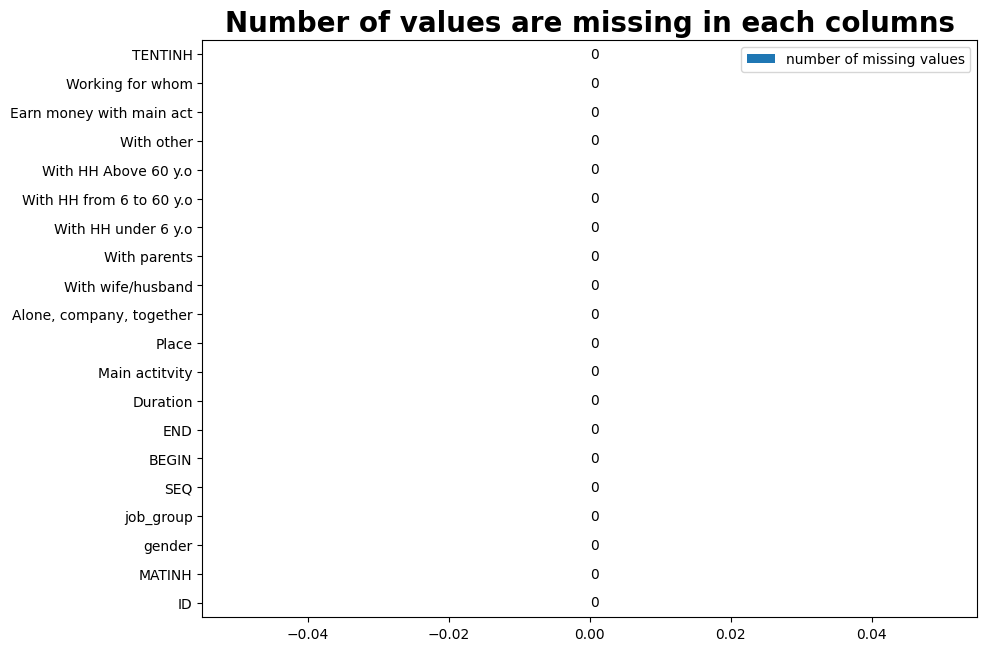

In [118]:
tmp = diary_main_df.isna().sum().sort_values(ascending=False)
fig, ax = plt.subplots(1, figsize = (10,7.5))
ax = tmp.plot.barh(rot = 0)
ax.set_title("Number of values are missing in each columns", fontweight = "bold", fontsize = 20)
plt.legend(labels = ["number of missing values"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Có 4 thuộc tính có số dữ liệu thiếu giống nhau. Ta xét trường hợp này.

In [111]:
Nan_row = diary_main_df.isna().sum(axis=1)
Drop_row = Nan_row[Nan_row >= 4].index
print(f"Có {len(Drop_row)} dòng bị thiếu nhiều hơn 4 thuộc tính.")

Có 15320 dòng bị thiếu nhiều hơn 4 thuộc tính.


In [112]:
diary_main_df.drop(Drop_row, inplace=True)
diary_main_df.describe()

,ID,MATINH,gender,job_group,SEQ,BEGIN,END,Duration,Q401,Q403,Q404,int1,int2,int3,int4,int5,int6,Q406A,Q407A
count,1.036130e+05,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000,103613.000000
mean,5.028968e+14,49.784419,1.692635,2.956627,11.186907,774.154401,826.210997,52.056595,981.175837,2.247604,1.321494,0.100470,0.024437,0.077432,0.096552,0.008020,0.098144,0.124936,1.070512
std,2.837329e+14,28.109443,0.461404,1.655645,6.690100,315.350857,319.652201,62.506492,493.213141,2.022178,0.467052,0.300627,0.154403,0.267278,0.295348,0.089196,0.297511,0.330648,1.569925
min,1.001000e+13,1.000000,1.000000,1.000000,1.000000,240.000000,250.000000,10.000000,101.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.130411e+14,31.000000,1.000000,1.000000,6.000000,460.000000,540.000000,20.000000,601.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445419e+14,44.000000,2.000000,2.000000,10.000000,750.000000,800.000000,30.000000,798.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.774727e+14,77.000000,2.000000,5.000000,16.000000,1060.000000,1100.000000,60.000000,1502.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,9.596132e+14,95.000000,2.000000,5.000000,46.000000,1670.000000,1680.000000,860.000000,9999.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [113]:
diary_main_df.rename(columns= {
    'Q401': 'Main actitvity', 'Q403': 'Place', 'Q404': 'Alone, company, together', 
    'Q406A': 'Earn money with main act', 'Q407A' : 'Working for whom',
    'int1': 'With wife/husband', 'int2': 'With parents', 'int3': 'With HH under 6 y.o', 'int4': 'With HH from 6 to 60 y.o',
    'int5': 'With HH Above 60 y.o', 'int6' : 'With other'
}, inplace= True)
diary_main_df.head()

,ID,MATINH,gender,job_group,SEQ,BEGIN,END,Duration,Main actitvity,Place,"Alone, company, together",With wife/husband,With parents,With HH under 6 y.o,With HH from 6 to 60 y.o,With HH Above 60 y.o,With other,Earn money with main act,Working for whom
0,10010000600801,1,2,1,18,1350,1370,20,1503,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10010000600801,1,2,1,8,750,900,150,101,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
2,10010000600801,1,2,1,4,340,360,20,1598,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,10010000600801,1,2,1,7,710,750,40,1502,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10010000600801,1,2,1,17,1260,1350,90,1401,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
diary_main_df = diary_main_df.merge(matinh_df, on= 'MATINH')

In [115]:
diary_main_df.to_excel('./data/Output/Diary.xlsx')